# Exploring Customer Behavior and Market Patterns

Analyze customer behavior, sales patterns, and product performance using the Olist e-commerce dataset to generate insights that improve marketing strategy, boost customer retention, and optimize business performance.

In [74]:
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv("data/olist_customers_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
payments = pd.read_csv("data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
category_translation = pd.read_csv("data/product_category_name_translation.csv")


In [3]:
# Print dataset first few rows for verification
print("Customers Dataset:")
print(customers.head())
print("\nOrders Dataset:")
print(orders.head())
print("\nProducts Dataset:")
print(products.head())
print("\nSellers Dataset:")
print(sellers.head())
print("\nOrder Items Dataset:")
print(order_items.head())
print("\nPayments Dataset:")
print(payments.head())
print("\nReviews Dataset:")
print(reviews.head())
print("\nGeolocation Dataset:")
print(geolocation.head())
print("\nCategory Translation Dataset:")
print(category_translation.head())


Customers Dataset:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Orders Dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432e

In [4]:
#Shape of datasets
print(f"Customers shape: {customers.shape}")
print(f"Orders shape: {orders.shape}")
print(f"Products shape: {products.shape}")
print(f"Sellers shape: {sellers.shape}")
print(f"Order Items shape: {order_items.shape}")
print(f"Payments shape: {payments.shape}")
print(f"Reviews shape: {reviews.shape}")
print(f"Geolocation shape: {geolocation.shape}")
print(f"Category Translation shape: {category_translation.shape}")


Customers shape: (99441, 5)
Orders shape: (99441, 8)
Products shape: (32951, 9)
Sellers shape: (3095, 4)
Order Items shape: (112650, 7)
Payments shape: (103886, 5)
Reviews shape: (99224, 7)
Geolocation shape: (1000163, 5)
Category Translation shape: (71, 2)


In [5]:
#Dataset Overview
datasets = {
    "Customers": customers,
    "Orders": orders,
    "Products": products,
    "Sellers": sellers,
    "Order Items": order_items,
    "Payments": payments,
    "Reviews": reviews,
    "Geolocation": geolocation,
    "Category Translation": category_translation
}
for name, df in datasets.items():
    print(f"\n{name} Dataset Overview:")
    print(df.info())
   


Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Orders Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 

In [6]:
# Missing Values Analysis
for name, df in datasets.items():
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())


Missing values in Customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing values in Orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values in Products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing values in Sellers:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
sel

In [7]:
#Drop columns with excessive missing values
for name, df in datasets.items():
    threshold = len(df) *0.5
    df.dropna(thresh=threshold, axis=1, inplace=True)
    datasets[name] = df
    print(f"\nAfter dropping columns with >50% missing values in {name}:")
    print(df.isnull().sum())

# Update datasets after cleaning
customers = datasets["Customers"]
orders = datasets["Orders"]
products = datasets["Products"]
sellers = datasets["Sellers"]
order_items = datasets["Order Items"]
payments = datasets["Payments"]
reviews = datasets["Reviews"]
geolocation = datasets["Geolocation"]
category_translation = datasets["Category Translation"]




After dropping columns with >50% missing values in Customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

After dropping columns with >50% missing values in Orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

After dropping columns with >50% missing values in Products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

After dropping 

In [8]:
# Check missing values and data types in orders and products
print("=" * 50)
print("ORDERS Dataset - Missing Values & Data Types:")
print("=" * 50)
print(orders.isnull().sum())
print("\nData types:")
print(orders.dtypes)

print("\n" + "=" * 50)
print("PRODUCTS Dataset - Missing Values & Data Types:")
print("=" * 50)
print(products.isnull().sum())
print("\nData types:")
print(products.dtypes)

# Check percentage of missing values
print("\n" + "=" * 50)
print("Missing Values Percentage:")
print("=" * 50)
for col in orders.columns:
    missing_pct = (orders[col].isnull().sum() / len(orders)) * 100
    if missing_pct > 0:
        print(f"Orders - {col}: {missing_pct:.2f}%")

for col in products.columns:
    missing_pct = (products[col].isnull().sum() / len(products)) * 100
    if missing_pct > 0:
        print(f"Products - {col}: {missing_pct:.2f}%")

ORDERS Dataset - Missing Values & Data Types:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Data types:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

PRODUCTS Dataset - Missing Values & Data Types:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
pro

In [9]:
 # Convert order timestamp columns to datetime and add missing flags
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')

orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Impute / fill products fields
products['product_category_name'] = products['product_category_name'].fillna('unknown')

num_impute = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

for col in num_impute:
    if col in products.columns:
        products[col] = products[col].fillna(products[col].median())

# Update datasets dict / variables
datasets['Orders'] = orders
datasets['Products'] = products

# Quick checks
print('Orders missing after handling:')
print(orders[['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isnull().sum())
print('\nProducts missing after handling:')
print(products[num_impute + ['product_category_name']].isnull().sum())



Orders missing after handling:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

Products missing after handling:
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_category_name         0
dtype: int64


In [10]:
# Impute / fill order_approved_at with order_purchase_timestamp 
orders['order_approved_at'] = orders['order_approved_at'].fillna(
    orders['order_purchase_timestamp']
)


In [12]:
# Fill order_delivered_carrier_date using median delivery time
median_ship_time = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).median()

orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(
    orders['order_approved_at'] + median_ship_time)

In [ ]:
# Impute order_delivered_customer_date using median delivery duration:
median_delivery_time = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).median()

orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(
    orders['order_delivered_carrier_date'] + median_delivery_time
)


In [17]:
print(orders.isnull().sum()) 


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [18]:
# Check for duplicate rows 
print("=" * 50)
print("DUPLICATE ROWS CHECK:")
print("=" * 50)
for name, df in datasets.items():
    duplicates = df.duplicated().sum()
    print(f"Duplicates in {name}: {duplicates}")
    if duplicates > 0:
        datasets[name] = df.drop_duplicates()
        print(f"  → Removed {duplicates} duplicates")

DUPLICATE ROWS CHECK:
Duplicates in Customers: 0
Duplicates in Orders: 0
Duplicates in Products: 0
Duplicates in Sellers: 0
Duplicates in Order Items: 0
Duplicates in Payments: 0
Duplicates in Reviews: 0
Duplicates in Geolocation: 0
Duplicates in Category Translation: 0


## Exploratory SQL Analysis (Business-Level KPIs)

In [ ]:
# confirm DataFrames exist
needed = ["customers","orders","order_items","payments","products","sellers","geolocation","reviews","category_translation"]
missing = [n for n in needed if n not in globals()]
if missing:
    raise NameError(f"These DataFrame variables are missing in memory: {missing}. Load them first.")

# create/open database and write tables
db_path = "olist.db"
conn = sqlite3.connect(db_path)

customers.to_sql("customers", conn, if_exists="replace", index=False)
orders.to_sql("orders", conn, if_exists="replace", index=False)
order_items.to_sql("order_items", conn, if_exists="replace", index=False)
payments.to_sql("payments", conn, if_exists="replace", index=False)
products.to_sql("products", conn, if_exists="replace", index=False)
sellers.to_sql("sellers", conn, if_exists="replace", index=False)
geolocation.to_sql("geolocation", conn, if_exists="replace", index=False)
reviews.to_sql("reviews", conn, if_exists="replace", index=False)
category_translation.to_sql("category_translation", conn, if_exists="replace", index=False)

# verify
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cursor.fetchall()]
print("Tables in DB:", tables)

# show row counts for each table
for t in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {t};")
    print(f"{t}: {cursor.fetchone()[0]} rows")

conn.close()

print(f"\nDatabase created at: {os.path.abspath(db_path)}")


Tables in DB: ['customers', 'orders', 'order_items', 'payments', 'products', 'sellers', 'geolocation', 'reviews', 'category_translation']
customers: 99441 rows
orders: 99441 rows
order_items: 112650 rows
payments: 103886 rows
products: 32951 rows
sellers: 3095 rows
geolocation: 1000163 rows
reviews: 99224 rows
category_translation: 71 rows

Database created at: c:\Users\user\Documents\My Projects\E-Commerce Insights and Trends\olist.db


In [24]:
conn = sqlite3.connect("olist.db")

pd.read_sql("SELECT * FROM customers LIMIT 5;", conn)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Count total orders
pd.read_sql("""
SELECT COUNT(*) AS total_orders
FROM orders;
""", conn)


,total_orders
0,99441


In [26]:
# Count distinct customers
pd.read_sql("""
SELECT COUNT(DISTINCT customer_id) AS distinct_customers
FROM orders;
""", conn)  


,distinct_customers
0,99441


In [ ]:
# Total revenue
pd.read_sql("""
SELECT SUM(payment_value) AS total_revenue 
FROM payments;
""", conn)

,AStotal_revenue
0,1.600887e+07


In [29]:
# Average order value
pd.read_sql("""
SELECT 
    SUM(payment_value) * 1.0 / COUNT(DISTINCT order_id) AS AOV
FROM payments;
""", conn)


,AOV
0,160.990267


In [30]:
# Orders Per year
pd.read_sql("""
SELECT 
    strftime('%Y', order_purchase_timestamp) AS year,
    COUNT(*) AS orders
FROM orders
GROUP BY year
ORDER BY year;
""", conn)

,year,orders
0,2016,329
1,2017,45101
2,2018,54011


In [34]:
# Top 10 cities with most customers
pd.read_sql("""
SELECT 
customer_city,
COUNT(*) AS total_customers
FROM customers
GROUP BY customer_city
ORDER BY total_customers DESC
LIMIT 10;
""", conn)

,customer_city,total_customers
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [35]:
#Distribution of order status
pd.read_sql("""
SELECT 
            order_status,
            COUNT(*) AS status_count
            FROM orders
            GROUP BY order_status;
""", conn) 

,order_status,status_count
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


## Customer behavior analysis

In this section, customer activity and purchasing patterns are examined in more detail.
The goal is to understand how customers interact with the marketplace, how often they buy, how much they spend, and how basket composition varies. These patterns inform retention strategies, segmentation, and future ML modeling.

In [41]:
# Number of times per order
pd.read_sql("""
SELECT 
    oi.order_id,
    COUNT(DISTINCT oi.product_id) AS unique_products,
    COUNT(*) AS total_items,
    GROUP_CONCAT(DISTINCT ct.product_category_name_english) AS product_categories
FROM order_items oi
JOIN products p 
      ON oi.product_id = p.product_id
LEFT JOIN category_translation ct 
      ON p.product_category_name = ct.product_category_name
GROUP BY oi.order_id
ORDER BY total_items DESC
LIMIT 10;
""", conn)

,order_id,unique_products,total_items,product_categories
0,8272b63d03f5f79c56e9e4120aec44ef,3,21,health_beauty
1,ab14fdcfbe524636d65ee38360e22ce8,1,20,auto
2,1b15974a0141d54e36626dca3fdc731a,1,20,computers_accessories
3,9ef13efd6949e4573a18964dd1bbe7f5,1,15,garden_tools
4,428a2f660dc84138d969ccd69a0ab6d5,1,15,furniture_decor
5,9bdc4d4c71aa1de4606060929dee888c,1,14,telephony
6,73c8ab38f07dc94389065f7eba4f297a,1,14,garden_tools
7,37ee401157a3a0b28c9c6d0ed8c3b24b,1,13,telephony
8,c05d6a79e55da72ca780ce90364abed9,2,12,housewares
9,af822dacd6f5cff7376413c03a388bb7,2,12,housewares


- The highest-volume orders contain 12 to 21 items, but they are generally concentrated in one or two product categories. This indicates that large orders tend to be bulk purchases rather than diverse baskets. Categories such as health_beauty, auto, computers_accessories, and garden_tools dominate the top multi-item orders, suggesting that these product lines may drive higher-volume transactions.

In [44]:
 # How many orders each customer has placed 
pd.read_sql("""
SELECT 
    c.customer_unique_id,
    COUNT(*) AS total_orders
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_unique_id
ORDER BY total_orders DESC
            LIMIT 20;
""", conn)

,customer_unique_id,total_orders
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,ca77025e7201e3b30c44b472ff346268,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
5,f0e310a6839dce9de1638e0fe5ab282a,6
6,de34b16117594161a6a89c50b289d35a,6
7,dc813062e0fc23409cd255f7f53c7074,6
8,63cfc61cee11cbe306bff5857d00bfe4,6
9,47c1a3033b8b77b3ab6e109eb4d5fdf3,6


- Most customers place only one order, and very few reach high order counts. The top customer has 17 total orders, but this behavior is rare. The distribution confirms that the platform relies heavily on single-purchase customers, with only a small minority showing strong loyalty or repeated purchasing.

In [ ]:
# One-time vs. Repeat Buyers Purchase Rate 
pd.read_sql("""
WITH customer_orders AS (
    SELECT 
        c.customer_unique_id,
        COUNT(*) AS total_orders
    FROM orders o
    JOIN customers c 
          ON o.customer_id = c.customer_id
    GROUP BY c.customer_unique_id
)
SELECT
    SUM(CASE WHEN total_orders = 1 THEN 1 ELSE 0 END) AS one_time_buyers,
    SUM(CASE WHEN total_orders > 1 THEN 1 ELSE 0 END) AS repeat_buyers,
    (SUM(CASE WHEN total_orders > 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS repeat_purchase_rate
FROM customer_orders;
""", conn)

,one_time_buyers,repeat_buyers,repeat_purchase_rate
0,93099,2997,3.118756


- The majority of customers are one-time buyers (96.9%), while only 3.1% return to make additional purchases. This indicates low customer retention, meaning most revenue comes from new customer acquisition rather than repeat customers. The small repeat-buyer segment suggests an opportunity to strengthen retention strategies and encourage more frequent purchasing.

In [49]:
# Total spending per customer
pd.read_sql("""
SELECT  c.customer_unique_id,
    SUM(oi.price + oi.freight_value) AS total_spent
FROM orders o
JOIN order_items oi
            ON o.order_id = oi.order_id
JOIN customers c
            ON o.customer_id = c.customer_id
GROUP BY c.customer_unique_id
ORDER BY total_spent DESC
LIMIT 20;
""", conn)

,customer_unique_id,total_spent
0,0a0a92112bd4c708ca5fde585afaa872,13664.08
1,da122df9eeddfedc1dc1f5349a1a690c,7571.63
2,763c8b1c9c68a0229c42c9fc6f662b93,7274.88
3,dc4802a71eae9be1dd28f5d788ceb526,6929.31
4,459bef486812aa25204be022145caa62,6922.21
5,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66
6,4007669dec559734d6f53e029e360987,6081.54
7,5d0a2980b292d049061542014e8960bf,4809.44
8,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34
9,48e1ac109decbb87765a3eade6854098,4681.78


- Spending is highly concentrated among a small segment of customers. The top spenders contribute between 4,000 and 13,600 BRL each, indicating the presence of a high-value customer group whose purchasing behavior significantly influences overall revenue. These customers likely represent premium segments or frequent buyers with strong purchasing power.

In [ ]:
# Average Order Value (AOV) per Customer
pd.read_sql("""
WITH customer_orders AS (
    SELECT 
        c.customer_unique_id,
        COUNT(*) AS total_orders
    FROM orders o
    JOIN customers c 
          ON o.customer_id = c.customer_id
    GROUP BY c.customer_unique_id
),
customer_spending AS (
    SELECT
        c.customer_unique_id,
        SUM(oi.price + oi.freight_value) AS total_spent
    FROM orders o
    JOIN order_items oi 
          ON o.order_id = oi.order_id
    JOIN customers c 
          ON o.customer_id = c.customer_id
    GROUP BY c.customer_unique_id
)
SELECT
    cs.customer_unique_id,
    cs.total_spent,
    co.total_orders,
    cs.total_spent * 1.0 / co.total_orders AS avg_order_value
FROM customer_spending cs
JOIN customer_orders co 
      ON cs.customer_unique_id = co.customer_unique_id
ORDER BY avg_order_value DESC
LIMIT 20;
""", conn)

,customer_unique_id,total_spent,total_orders,avg_order_value
0,0a0a92112bd4c708ca5fde585afaa872,13664.08,1,13664.08
1,763c8b1c9c68a0229c42c9fc6f662b93,7274.88,1,7274.88
2,dc4802a71eae9be1dd28f5d788ceb526,6929.31,1,6929.31
3,459bef486812aa25204be022145caa62,6922.21,1,6922.21
4,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66,1,6726.66
5,4007669dec559734d6f53e029e360987,6081.54,1,6081.54
6,5d0a2980b292d049061542014e8960bf,4809.44,1,4809.44
7,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34,1,4764.34
8,48e1ac109decbb87765a3eade6854098,4681.78,1,4681.78
9,edde2314c6c30e864a128ac95d6b2112,4513.32,1,4513.32


- The results show the customers with the highest spending per order. Each of the top customers placed a single order, which means their average order value equals their total spending. These transactions represent high-value purchases concentrated in one order rather than repeated buying behavior. This indicates that a small number of customers contribute disproportionately through large, one-off transactions, reflecting high-ticket product categories or bulk purchases

In [53]:
# Time span between first and last purchase for each customer
pd.read_sql("""
WITH customer_dates AS (
    SELECT
        c.customer_unique_id,
        MIN(o.order_purchase_timestamp) AS first_order,
        MAX(o.order_purchase_timestamp) AS last_order
    FROM orders o
    JOIN customers c 
          ON o.customer_id = c.customer_id
    GROUP BY c.customer_unique_id
)
SELECT
    customer_unique_id,
    first_order,
    last_order,
    julianday(last_order) - julianday(first_order) AS days_active
FROM customer_dates
ORDER BY days_active DESC
LIMIT 20;
""", conn)

,customer_unique_id,first_order,last_order,days_active
0,32ea3bdedab835c3aa6cb68ce66565ef,2016-10-03 09:44:50,2018-06-28 11:46:04,633.084190
1,ccafc1c3f270410521c3c6f3b249870f,2016-10-06 19:33:34,2018-06-07 19:03:12,608.978912
2,d8f3c4f441a9b59a29f977df16724f38,2017-01-18 21:08:18,2018-08-24 17:52:59,582.864363
3,94e5ea5a8c1bf546db2739673060c43f,2016-10-05 21:10:56,2018-05-09 13:49:19,580.693322
4,87b3f231705783eb2217e25851c0a45d,2016-10-08 18:45:34,2018-05-04 11:14:37,572.686840
5,8f6ce2295bdbec03cd50e34b4bd7ba0a,2017-02-09 12:48:59,2018-07-31 22:03:59,537.385417
6,30b782a79466007756f170cb5bd6bbd8,2017-02-20 19:58:47,2018-07-30 22:09:45,525.090949
7,4e23e1826902ec9f208e8cc61329b494,2016-10-05 12:32:55,2018-03-13 22:28:21,524.413495
8,a1c61f8566347ec44ea37d22854634a1,2017-03-19 08:36:36,2018-08-25 11:01:56,524.100926
9,a262442e3ab89611b44877c7aaf77468,2017-02-17 18:27:58,2018-07-24 16:44:34,521.928194


- Measures the active purchasing window for each customer. Longer spans indicate extended engagement over multiple years, while shorter windows suggest one-time or short-term buyers. This metric helps approximate customer lifetime value and identify customers with sustained purchasing behavior.

In [79]:

# Orders per customer by year
pd.read_sql("""
SELECT
    c.customer_unique_id,
    strftime('%Y', o.order_purchase_timestamp) AS year,
    COUNT(*) AS orders_in_year
FROM orders o
JOIN customers c 
      ON o.customer_id = c.customer_id
GROUP BY c.customer_unique_id, year
ORDER BY year, orders_in_year DESC
LIMIT 20;
""", conn)

,customer_unique_id,year,orders_in_year
0,0ecf7f65b5ff3b9e61b637e59f495e0a,2016,2
1,7a176e5d88c7acb6000a055e008c055d,2016,2
2,f7b62c75467e8ce080b201667cbbc274,2016,2
3,0032c76b20340da25249092a268ce66c,2016,1
4,009b0127b727ab0ba422f6d9604487c7,2016,1
5,00f0b70fdcb8a6e1671b52a2472bd41f,2016,1
6,01f156677184504063bd19739f924af1,2016,1
7,0313291a6f4f16df04dcf819d88c38ef,2016,1
8,046ed33aa8bef51855af6010a11a835c,2016,1
9,0636d30c77f0f9cfad81f1c9b58c791f,2016,1


- Shows how many orders each customer placed within a specific year. Higher counts indicate customers with consistent annual purchasing activity, while most customers place only a single order in a given year. This metric highlights year-over-year engagement and helps identify customers with stable repeat behavior.

## Orders and Sales Analysis

Orders and sales analysis provides a high-level view of business performance by examining order volume, revenue trends, average order value, and delivery efficiency over time. This analysis helps identify growth patterns, seasonality, and demand fluctuations, while also highlighting operational performance through order status and delivery timelines.

By visualizing monthly trends and seasonal patterns, the analysis supports forecasting, capacity planning, and marketing optimization. It also complements customer behavior analysis by contextualizing *when* and *how* customers transact, forming a complete picture of overall marketplace performance.



In [64]:
# Monthly order count
monthly_orders = pd.read_sql("""
SELECT 
    strftime('%Y-%m', order_purchase_timestamp) AS order_month,
    COUNT(order_id) AS total_orders
FROM orders
GROUP BY order_month
ORDER BY order_month;
""", conn) 

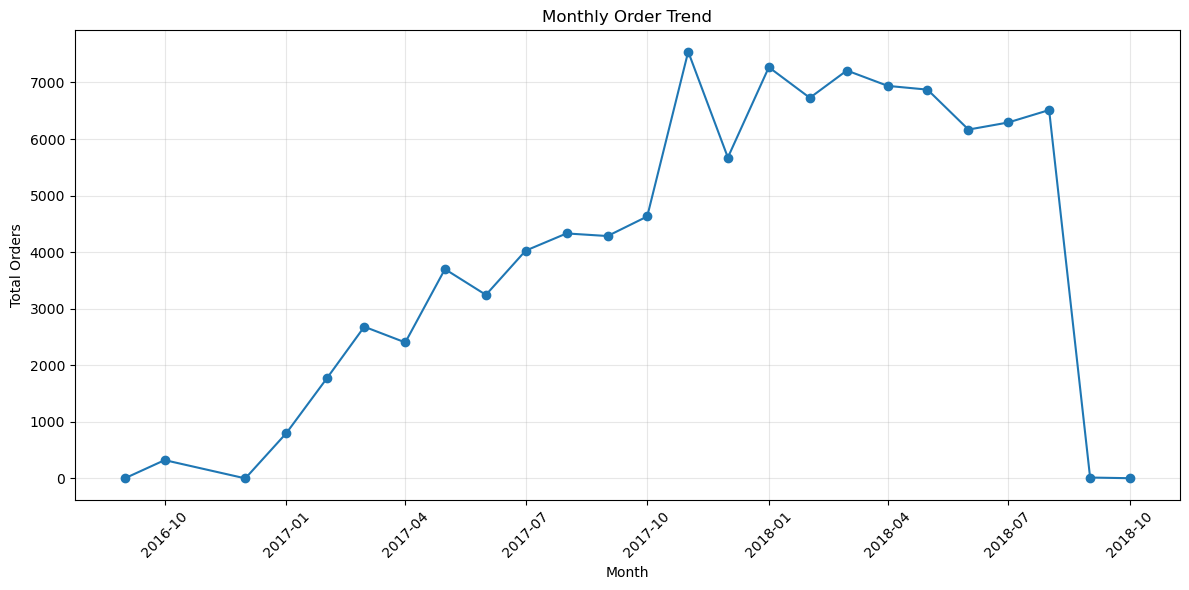

In [65]:
#Plot a line chart of monthly order counts
# Convert order_month to datetime for proper plotting
monthly_orders['order_month'] = pd.to_datetime(monthly_orders['order_month'])

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['order_month'], monthly_orders['total_orders'], marker='o', linestyle='-')
plt.title('Monthly Order Trend') 
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- The monthly order trend reveals a clear and sustained growth trajectory, particularly from early 2017 through mid-2018, indicating increasing customer adoption and marketplace liquidity. The presence of pronounced peaks suggests seasonal demand effects, likely driven by promotional cycles or holidays. The terminal decline is attributable to incomplete data coverage for the final month, not a structural drop in demand.


In [66]:
# Monthly revenue
monthly_revenue= pd.read_sql("""
SELECT 
    strftime('%Y-%m', o.order_purchase_timestamp) AS month,
    SUM(oi.price + oi.freight_value) AS total_revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY month
ORDER BY month;
""", conn)

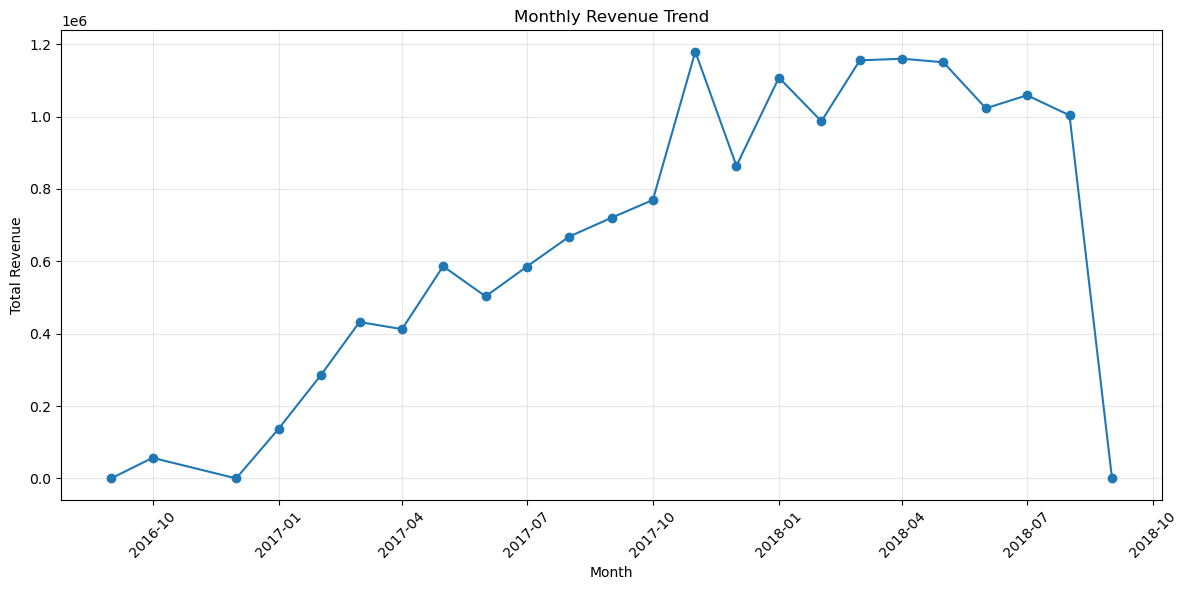

In [67]:
# Plot a line chart of monthly revenue
monthly_revenue['month'] = pd.to_datetime(monthly_revenue['month'])
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['month'], monthly_revenue['total_revenue'], marker='o', linestyle='-')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- Revenue closely tracks order volume, confirming that top-line growth is primarily driven by increased transaction frequency rather than pricing inflation. Periods where revenue growth slightly outpaces order growth imply shifts toward higher-priced baskets or category mix effects. As with order volume, the final-period drop reflects dataset truncation.

In [68]:
# Average Order Value (AOV) per month
monthly_aov= pd.read_sql(""" 
WITH monthly_data AS (
    SELECT 
        strftime('%Y-%m', o.order_purchase_timestamp) AS month,
        oi.order_id,
        SUM(oi.price + oi.freight_value) AS order_total
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY month, oi.order_id
)
SELECT 
    month,
    AVG(order_total) AS avg_order_value
FROM monthly_data
GROUP BY month
ORDER BY month;
""", conn)

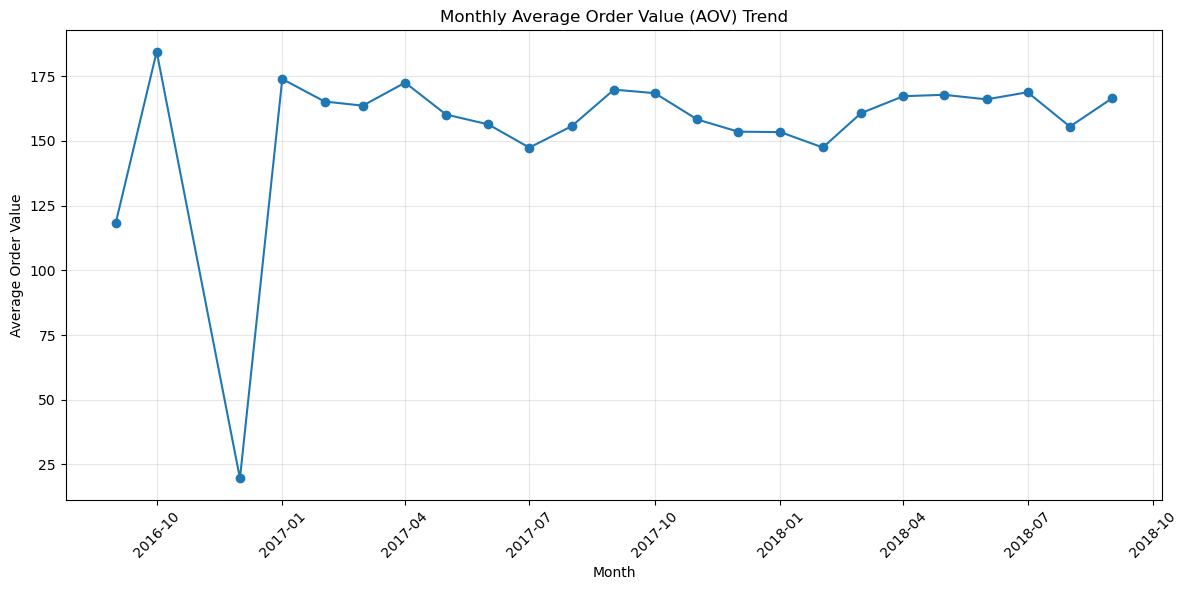

In [69]:
#Plot a line chart of monthly AOV
monthly_aov['month'] = pd.to_datetime(monthly_aov['month'])
plt.figure(figsize=(12, 6))
plt.plot(monthly_aov['month'], monthly_aov['avg_order_value'], marker='o', linestyle='-')
plt.title('Monthly Average Order Value (AOV) Trend')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3) 
plt.tight_layout()
plt.show()


- AOV remains relatively stable over time, with early-period volatility caused by low sample sizes. As order volume increases, AOV converges into a narrow band, indicating consistent purchasing behavior and price sensitivity across customers. This stability reinforces the conclusion that revenue growth is demand-led.

In [70]:
# Order status distribution
order_status_distribution = pd.read_sql("""
SELECT 
    order_status,
    COUNT(*) AS total_orders
FROM orders
GROUP BY order_status
ORDER BY total_orders DESC;
""", conn)

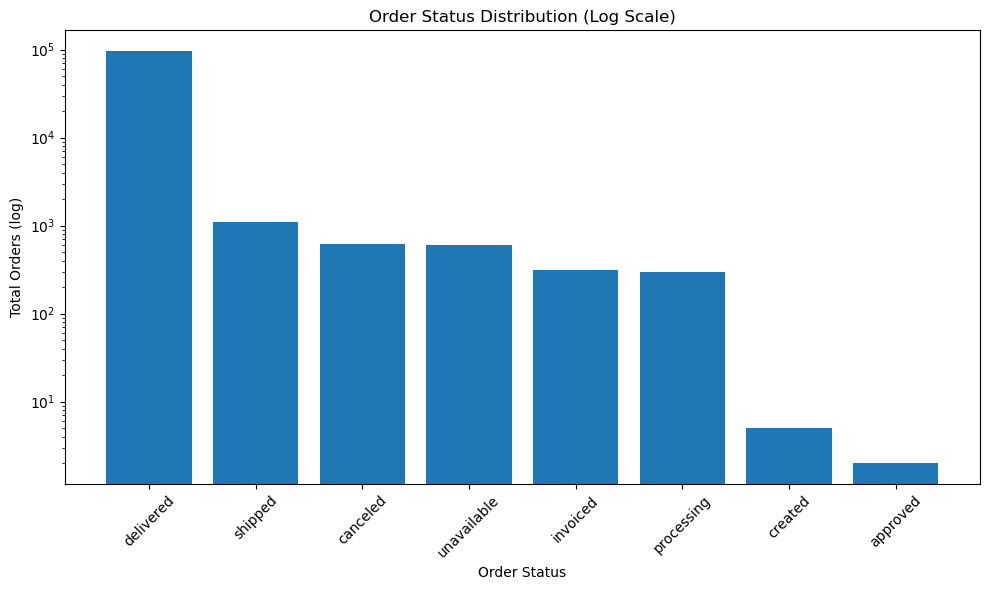

In [83]:
# Plot a bar chart of order status distribution
plt.figure(figsize=(10, 6))
plt.bar(
    order_status_distribution['order_status'],
    order_status_distribution['total_orders']
)
plt.yscale('log')
plt.title('Order Status Distribution (Log Scale)')
plt.xlabel('Order Status')
plt.ylabel('Total Orders (log)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




- Delivered orders dominate the distribution, while other statuses appear compressed due to scale differences. This indicates strong fulfillment completion rates, but also highlights the need for normalized or percentage-based views to properly assess cancellation, approval, and processing risks.

In [72]:
# Delivery time in days
delivery_time_analysis = pd.read_sql("""
SELECT 
    order_id,
    JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_purchase_timestamp) AS delivery_days
FROM orders
WHERE order_status = 'delivered'
  AND order_delivered_customer_date IS NOT NULL;
""", conn)

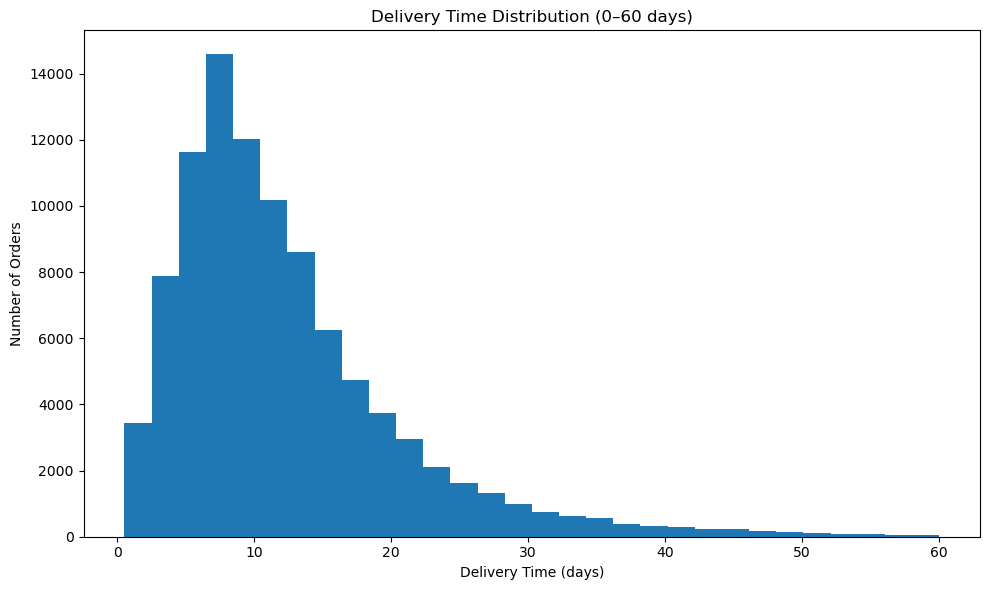

In [84]:
#Plot a histogram of delivery times
delivery_time_analysis = delivery_time_analysis[
    (delivery_time_analysis['delivery_days'] > 0) &
    (delivery_time_analysis['delivery_days'] <= 60)
]

plt.figure(figsize=(10, 6))
plt.hist(delivery_time_analysis['delivery_days'], bins=30)
plt.title('Delivery Time Distribution (0–60 days)')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

  

- Delivery times exhibit a right-skewed distribution, with most orders delivered within a predictable window and a long tail of delayed deliveries. These outliers likely reflect geographic constraints, logistics partner variability, or category-specific fulfillment challenges. While median delivery performance is stable, tail risk exists and should be segmented by region, seller, or product category in subsequent analyses.

In [76]:
# Orders by month and year for seasonality heatmap
seasonal_orders = pd.read_sql("""
SELECT 
    strftime('%Y', order_purchase_timestamp) AS year,
    strftime('%m', order_purchase_timestamp) AS month,
    COUNT(order_id) AS total_orders
FROM orders
GROUP BY year, month
ORDER BY year, month;
""", conn) 


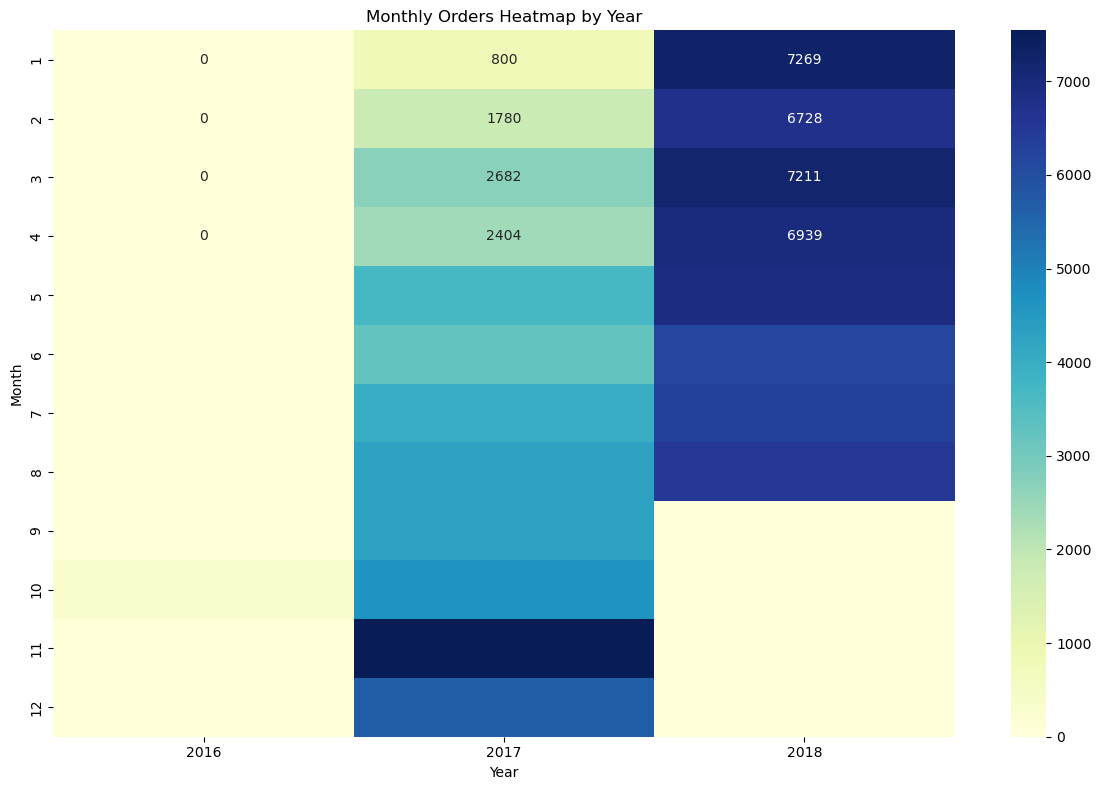

In [81]:
# Prepare data for heatmap
seasonal_orders['month'] = seasonal_orders['month'].astype(int)

seasonal_pivot = (
    seasonal_orders
    .pivot(index='month', columns='year', values='total_orders')
    .fillna(0)
    .sort_index()
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Monthly Orders Heatmap by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

- The heatmap exposes recurring seasonal peaks, particularly in late-year months, reinforcing the presence of demand cycles. Year-over-year growth within the same months further confirms structural expansion rather than one-off demand shocks.